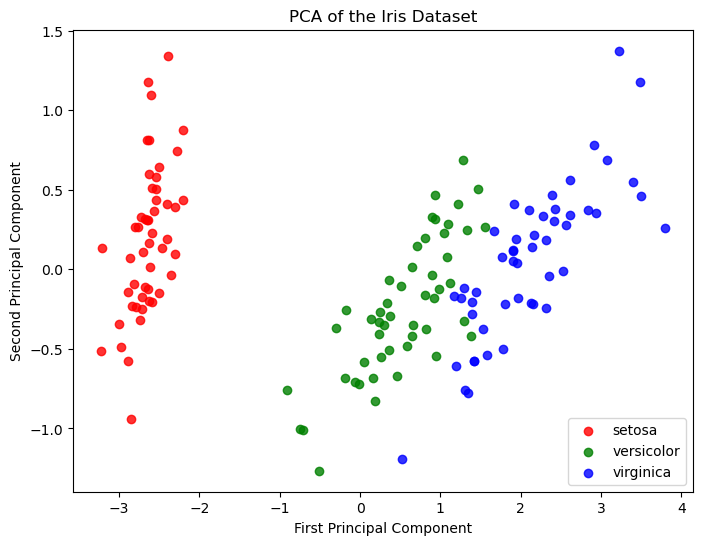

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


# Create a PCA object and specify the number of components to keep
pca = PCA(n_components=2)

# Fit the PCA model to the data and transform the data
X_pca = pca.fit_transform(X)


# Create a scatter plot of the two principal components
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['r', 'g', 'b'], [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, label=target_name)

plt.legend(loc='best')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of the Iris Dataset')
plt.show()



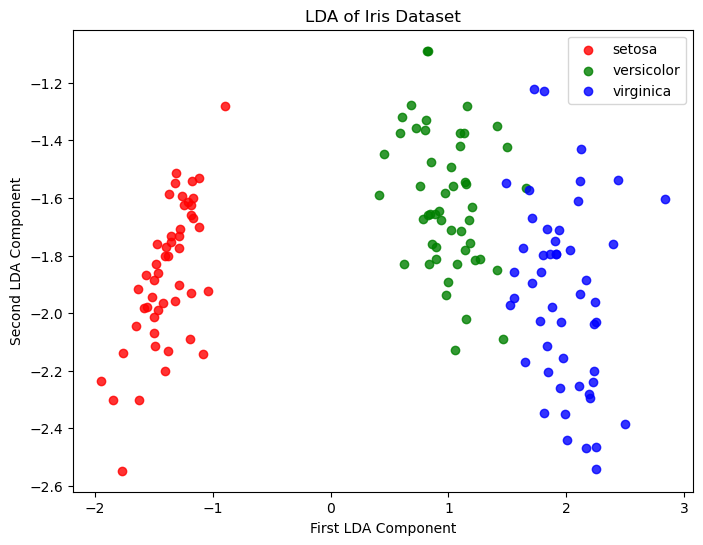

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

#Compute the mean vectors for each class:

mean_vectors = []
for cl in np.unique(y):
    mean_vectors.append(np.mean(X[y == cl], axis=0))

#Calculate the within-class scatter matrix:

S_W = np.zeros((X.shape[1], X.shape[1]))
for cl, mv in zip(np.unique(y), mean_vectors):
    class_scatter_matrix = np.zeros((X.shape[1], X.shape[1]))
    for row in X[y == cl]:
        row, mv = row.reshape(X.shape[1], 1), mv.reshape(X.shape[1], 1)
        class_scatter_matrix += (row - mv).dot((row - mv).T)
    S_W += class_scatter_matrix


#Calculate the between-class scatter matrix:

overall_mean = np.mean(X, axis=0).reshape(X.shape[1], 1)
S_B = np.zeros((X.shape[1], X.shape[1]))
for cl, mv in zip(np.unique(y), mean_vectors):
    n = X[y == cl].shape[0]
    mv = mv.reshape(X.shape[1], 1)
    S_B += n * (mv - overall_mean).dot((mv - overall_mean).T)
    
#Compute the eigenvectors and eigenvalues of the matrix S_W_inv * S_B

S_W_inv = np.linalg.inv(S_W)
eigenvalues, eigenvectors = np.linalg.eig(S_W_inv.dot(S_B))

#Sort the eigenvectors by their corresponding eigenvalues in descending order:

eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)


# Choose the top k eigenvectors to form the transformation matrix:

k = 2
W = np.hstack([eig_pairs[i][1].reshape(X.shape[1], 1) for i in range(k)])


#Transform the original data using the transformation matrix:

X_lda = X.dot(W)

#Visualize the transformed data in a scatter plot:

plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['r', 'g', 'b'], [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=0.8, label=target_name)

plt.legend(loc='best')
plt.xlabel('First LDA Component')
plt.ylabel('Second LDA Component')
plt.title('LDA of Iris Dataset')
plt.show()

